Gerekli Kütüphanelerin İçe Aktarılması

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2



Veri Setinin Yüklenmesi

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('DATASET'):
        print(dirname)

DATASET
DATASET\TEST
DATASET\TEST\O
DATASET\TEST\R
DATASET\TRAIN
DATASET\TRAIN\O
DATASET\TRAIN\R


In [4]:
train_path = "dataset/TRAIN/"
test_path = "dataset/TEST/"

In [5]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils import plot_model
from glob import glob

Veri Setinin Hazırlanması

In [6]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:05<00:00, 1755.10it/s]


In [7]:
data.shape

(22564, 2)

In [8]:
from collections import Counter
Counter(y_data)

Counter({'TRAIN\\O': 12565, 'TRAIN\\R': 9999})

Veri Setinin Görselleştirilmesi

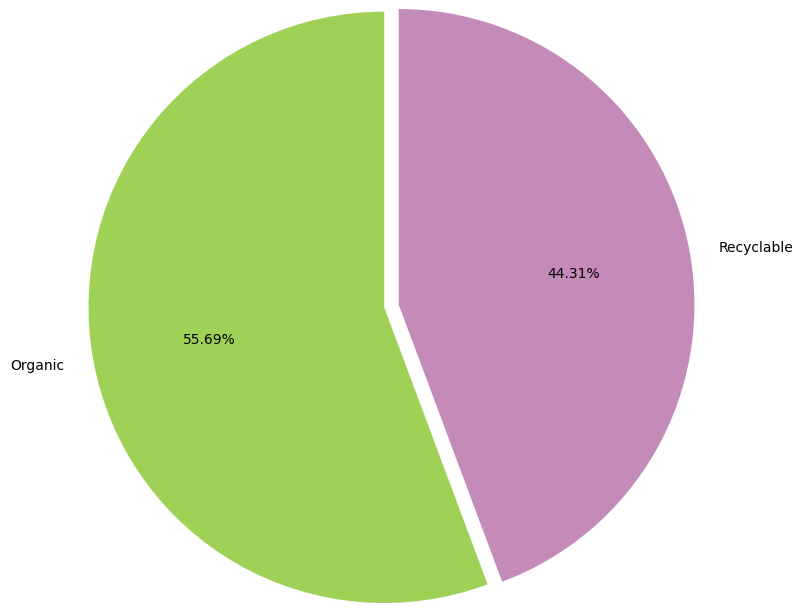

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

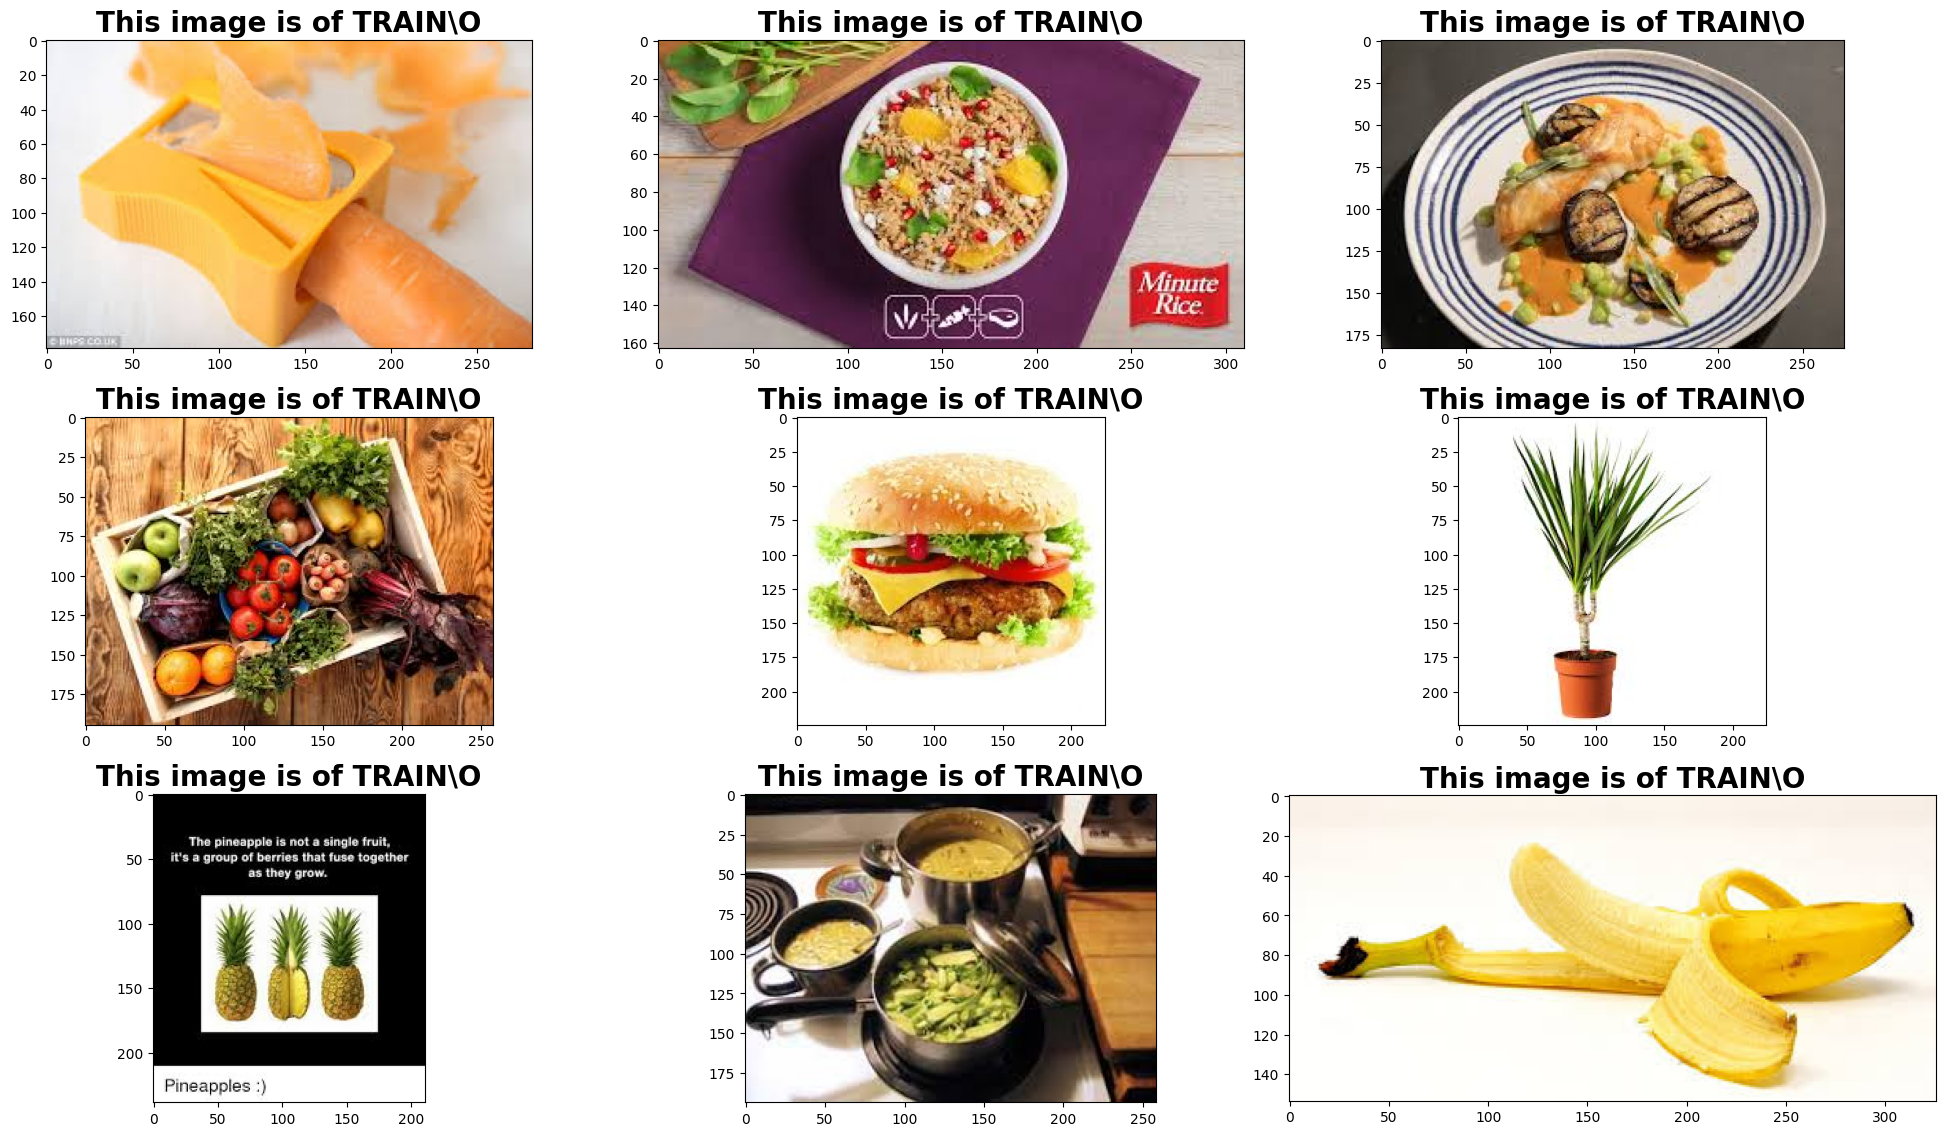

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

Sınıf Sayısının Belirlenmesi


In [11]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


Modelin Oluşturulması

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

batch_size = 256

In [13]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
plot_model(model)

Modelin Görselleştirilmesi

In [15]:
train_datagen = ImageDataGenerator(rescale= 1./255)


In [16]:
test_datagen = ImageDataGenerator(rescale= 1./255)


Veri Üreticilerinin Hazırlanması

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Modelin Eğitimi

In [19]:
hist = model.fit(
        x = train_generator,
        epochs=10,
        validation_data = test_generator)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 613s 7s/step - accuracy: 0.7025 - loss: 0.6779 - val_accuracy: 0.8460 - val_loss: 0.3800
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.8313 - loss: 0.4097 - val_accuracy: 0.8627 - val_loss: 0.3348
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8556 - loss: 0.3502 - val_accuracy: 0.8711 - val_loss: 0.3064
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8598 - loss: 0.3459 - val_accuracy: 0.9025 - val_loss: 0.2496
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.8719 - loss: 0.3203 - val_accuracy: 0.8926 - val_loss: 0.2828
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 572s 6s/step - accuracy: 0.8850 - loss: 0.2910 - val_accuracy: 0.8945 - val_loss: 0.2860
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 740s 8s/step - accuracy: 0.8984 - loss: 0.2547 - val_accuracy: 0.9105 - val_loss: 0.2610
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.9194 - loss: 0.2126 - val_accuracy: 0.8858 - v

Eğitim ve Doğrulama Sonuçlarının Görselleştirilmesi

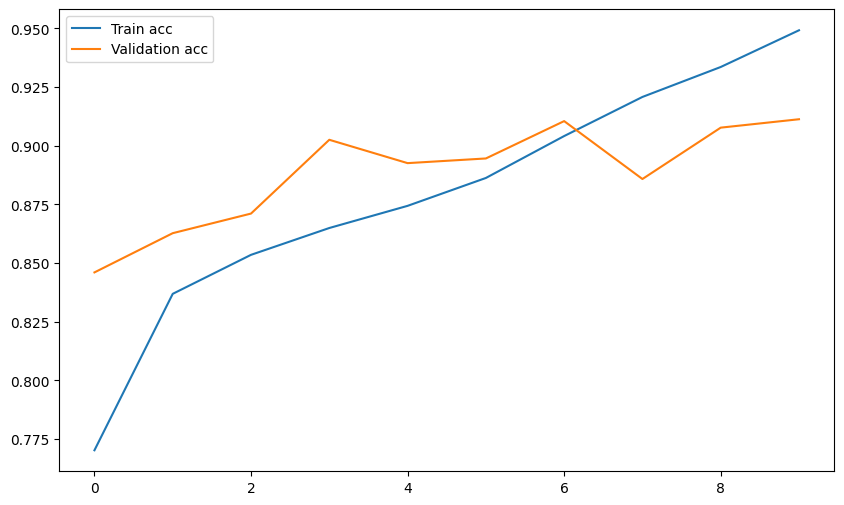

In [20]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

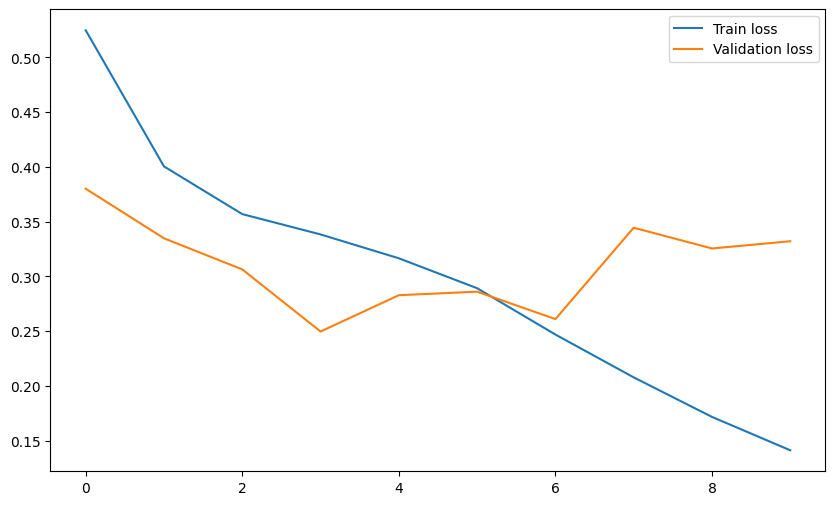

In [21]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

Tahmin Fonksiyonu

In [22]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
This image -> Organic


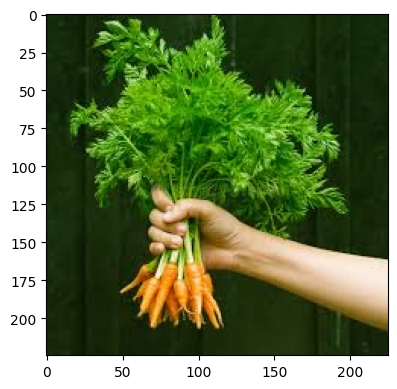

In [23]:
test_img = cv2.imread("dataset/TEST/O/O_12673.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This image -> Organic


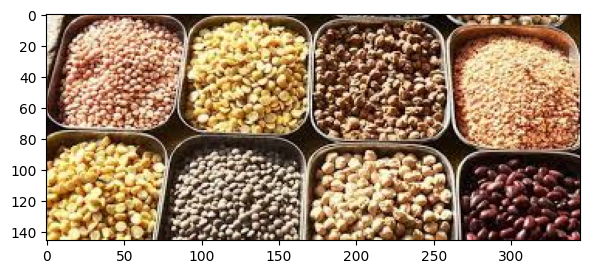

In [31]:
test_img = cv2.imread("dataset/TEST/O/O_13260.jpg")
predict_func(test_img)